# DSE 2262 MACHINE LEARNING LABORATORY


## Week 3 - EXERCISE 2:

**About Dataset**

**Context**

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

**Acknowledgements**

Anonymous but real source

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report


import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1


## Q1. Preprocessing

In [4]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Category', 'Recommended IND'],
      dtype='object')

### a. Find any null values are present or not, If present remove those data.


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Positive Feedback Count       0
Division Name                14
Department Name              14
Category                     14
Recommended IND               0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Positive Feedback Count,Recommended IND
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,2.535936,0.822362
std,6779.968547,203.298980,12.279544,1.110031,5.702202,0.382216
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,0.000000,1.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,3.000000,1.000000
max,23485.000000,1205.000000,99.000000,5.000000,122.000000,1.000000


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Positive Feedback Count    0
Division Name              0
Department Name            0
Category                   0
Recommended IND            0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Positive Feedback Count,Recommended IND
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,2.652477,0.818177
std,6772.063092,200.227528,12.258122,1.112224,5.834285,0.385708
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,0.000000,1.000000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17624.750000,1078.000000,52.000000,5.000000,3.000000,1.000000
max,23485.000000,1205.000000,99.000000,5.000000,122.000000,1.000000


### b. Remove the data that have less than 5 reviews.


In [10]:
counter = df.groupby('Clothing ID')

In [11]:
df = counter.filter(lambda x: len(x) > 5)  # pandas 0.13.1

### c. Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.

In [12]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [13]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [14]:
df["Review Text"] = df["Review Text"].apply(lambda x:cont_to_exp(x))

In [15]:
df["Title"] = df["Title"].apply(lambda x:cont_to_exp(x))

In [16]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]", " ", words)
    text = words.lower().split()
    return " ".join(text)
def remove_numbers(text):
    """The function to removing all numbers"""
    new_text = []
    for word in text.split():
        if not re.search('\\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [17]:
df['Review Text'] = df['Review Text'].astype(str)
df['Review Text'] = df['Review Text'].apply(clean_text)
df['Review Text'] = df['Review Text'].apply(remove_numbers)

In [18]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
23481,23481,1104,34,Great dress for many occasions,i was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1
23482,23482,862,48,Wish it was made of cotton,it reminds me of maternity clothes soft stretc...,3,0,General Petite,Tops,Knits,1
23483,23483,1104,31,"Cute, but see through",this fit well but the top was very see through...,3,1,General Petite,Dresses,Dresses,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,1
23485,23485,1104,52,Please make more like this one!,this dress in a lovely platinum is feminine an...,5,22,General Petite,Dresses,Dresses,1


## Q2. Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).

In [19]:
text_data = df['Review Text']
recommedation = df['Recommended IND']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(text_data, recommedation, test_size=0.2, random_state=42)

## Q3. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended

Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.



In [21]:
Pipe = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

#Fitting our dataset in the pipeline

Pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [22]:
Pipe.score(X_test,y_test)

0.814936847885777

## Q4. Tabulate accuracy in terms of precision, recall and F1 score.

In [23]:
y_pred = Pipe.predict(X_test)
print('confusion matrix :\n',confusion_matrix(y_test,y_pred))
print('precision_score :\n',precision_score(y_test,y_pred,pos_label=1))
print('recall_score :\n',recall_score(y_test,y_pred,pos_label=1))
print('classification_report :\n',classification_report(y_test,y_pred))

confusion matrix :
 [[   7  674]
 [   0 2961]]
precision_score :
 0.8145804676753783
recall_score :
 1.0
classification_report :
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       681
           1       0.81      1.00      0.90      2961

    accuracy                           0.81      3642
   macro avg       0.91      0.51      0.46      3642
weighted avg       0.85      0.81      0.73      3642



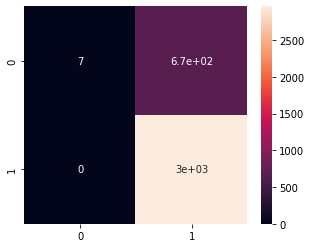

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [25]:
confusion_matrix1 = confusion_matrix(y_test,y_pred)
FN = confusion_matrix1[0][1]
FP = confusion_matrix1[1][0]
TP = confusion_matrix1[1][1]
TN = confusion_matrix1[0][0]
TPR = TP/(TP+FN)
TNR = TN /(TN+FP)
FPR=1-TPR
FNR=1-TNR
print("True Positive Rate - "+str(TPR))
print("True Negative Rate - "+str(TNR))
print("False Positive Rate - "+str(FPR))
print("False Negative Rate - "+str(FNR))
print("Sensitivity - "+str(TPR))
print("Specificity - "+str(TNR))

True Positive Rate - 0.8145804676753783
True Negative Rate - 1.0
False Positive Rate - 0.18541953232462172
False Negative Rate - 0.0
Sensitivity - 0.8145804676753783
Specificity - 1.0
